---
authors:
    - Nina Maherndl
    - JR
---

(pascal-cloudnet)=
# PS106 Cloudnet Target classification

## General information about this notebook

This notebook series has been initiated by the Data Management Project (INF) within the TR-172 ["ArctiC Amplification: Climate Relevant Atmospheric and SurfaCe Processes, and Feedback Mechanisms" (AC)³](http://www.ac3-tr.de/) funded by the German Research Foundation (Deutsche Forschungsgemeinschaft, DFG)

Author(s) of this notebook: 
 - *Nina Maherndl*, [*Leipzig University, Institute of Meteorology (LIM)*](*https://www.physgeo.uni-leipzig.de/institutefuermeteorologie/*), *Stephanstraße 3, 04103 Leipzig*, *nina.maherndl@uni-leipzig.de*
 - *Johannes Röttenbacher*, [*Institute of Environmental Physics*](http://www.iup.uni-bremen.de), *University of Bremen*, *Germany*, *jroettenbacher@iup.physik.uni-bremen.de*

GitHub repository: https://github.com/ac3-tr/ac3-book

This notebook is licensed under the [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/ "CC-BY-4.0")

## Dataset description

**Title:** Cloudnet target classification during PS106

**Authors:** Griesche, Hannes; Seifert, Patric; Engelmann, Ronny; Radenz, Martin; Bühl, Johannes

**Year:** 2020

**Institute:** Tropos, Leipzig

**Data hosted by:** [PANGAEA](https://pangaea.de)

**DOI:** [10.1594/PANGAEA.919463](https://doi.org/10.1594/PANGAEA.919463)

**License:** [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0/)

## Description

The dataset contains daily netCDF-files of the Cloudnet target classification during Polarstern cruise PS106 based on the following instruments:

- 35.5 GHz Cloud radar MIRA,
- Multiwavelength Raman polarization lidar PollyXT,
- Polarstern radiosonde data
- OceanRAIN optical disdrometer ODM470,
- Microwave radiometer.

The data is retrieved using the instrument synergistic approach Cloudnet ([Illingworth et al., 2007](https://journals.ametsoc.org/doi/10.1175/BAMS-88-6-883)).
This variable is a simplification of the bitfield "category_bits" in the target categorization and data quality dataset.
It provides the 9 main atmospheric target classifications that can be distinguished by radar and lidar.

### Target_classification: definition

0: Clear sky,

1: Cloud droplets only,

2: Drizzle or rain,

3: Drizzle/rain & cloud droplets,

4: Ice,

5: Ice & supercooled droplets,

6: Melting ice,

7: Melting ice &cloud droplets,

8: Aerosol,

9: Insects.


## Contents of this notebook

The purpose of this notebook is to show how to download and use the (AC)³ data set "Cloudnet target classification during PS106".
It contains the following plotting examples:

- location of the research vessel Polarstern (PS)
- cloud net target classification during specified day
- cloud top height during specified day
- cloud base height during specified day
- target classification + cloud top and base heights during specified day

## Import relevant modules

In [39]:
# basics, data handling
import pandas as pd
import xarray as xr
from pangaeapy import PanDataSet
import nest_asyncio
nest_asyncio.apply()
import datetime as dt

# plotting:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# plotting maps
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

%matplotlib inline

## Pre-processing of the imported data
The Pangaea python library [pangaeapy](https://pypi.org/project/pangaeapy) is used to download (parts of) the data set.

In [40]:
ds = PanDataSet(919463, enable_cache=True, cachedir='/media/jr/JR_SSD/tmp/pangaeapy_cache')

In [41]:
dl = ds.data  # this returns a pandas DataFrame listing each available netCDF file and metadata
dl.head()

,Event,Date/Time,File name,File format,File size,URL file,Latitude,Longitude,Elevation
0,PS106_0_Underway-14,2017-05-24,20170524_polarstern_classification,nc,340,https://hs.pangaea.de/model/GriescheH-etal_202...,57.05965,5.40226,-46.6
1,PS106_0_Underway-14,2017-05-25,20170525_polarstern_classification,nc,2174,https://hs.pangaea.de/model/GriescheH-etal_202...,57.05965,5.40226,-46.6
2,PS106_0_Underway-14,2017-05-26,20170526_polarstern_classification,nc,2303,https://hs.pangaea.de/model/GriescheH-etal_202...,57.05965,5.40226,-46.6
3,PS106_0_Underway-14,2017-05-27,20170527_polarstern_classification,nc,2265,https://hs.pangaea.de/model/GriescheH-etal_202...,57.05965,5.40226,-46.6
4,PS106_0_Underway-14,2017-05-28,20170528_polarstern_classification,nc,1530,https://hs.pangaea.de/model/GriescheH-etal_202...,57.05965,5.40226,-46.6


### Selecting the date
Pick the date from the list that you are interested in and get the index for downloading it.

In [42]:
dates = dl['Date/Time'].to_list()  # convert the pandas series to a list for easier search
date = dt.datetime(2017, 5, 24)  # select the date you want (should be within dates)
index = dates.index(date)
index

0

### Take a look at all data:
**Attention:** If you do not select an index you need to [supply an auth_token](https://pangaea-data-publisher.github.io/pangaeapy/how_to.html#download-all-files-from-a-binary-data-set) to download the complete data set. The whole data set consists of 55 datafiles (about 420 GB).

### Downloading the datafile

In [43]:
filenames = ds.download(indices=[index])

File 20170524_polarstern_classification.nc already exists, skipping.


## Reading in the datafile
The Cloudnet data is stored in netCDF files including time and height as coordinates

In [44]:
data = xr.open_dataset(filenames[0])
# or if you downloaded more than one file and want to read them all in
# data = xr.open_mfdataset(filenames)

# Location of the Polarstern
GPS coordinates of the Polarstern track are not included in the Cloudnet target classification dataset. If you want to see the location of Polarstern for your chosen date, you have to load the Mastertrack data ([Macke (2017)](https://doi.pangaea.de/10.1594/PANGAEA.881579) and [Flores (2017)](https://doi.pangaea.de/10.1594/PANGAEA.881580)). The data is also published on Pangaea, so it can be read with pangaeapy.

In [45]:
track_data1 = PanDataSet(881579, enable_cache=True, cachedir='/media/jr/JR_SSD/tmp/pangaeapy_cache').data
track_data2 = PanDataSet(881580, enable_cache=True, cachedir='/media/jr/JR_SSD/tmp/pangaeapy_cache').data
track_data = pd.concat([track_data1, track_data2])

In [46]:
track_data = track_data[(track_data['Date/Time'] > date.strftime('%Y-%m-%d 00:00:00')) & 
                        (track_data['Date/Time'] < date.strftime('%Y-%m-%d 23:59:59'))] 

In [47]:
lat = track_data['Latitude'].values
lon = track_data['Longitude'].values

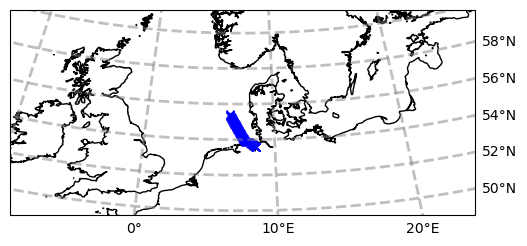

In [48]:
fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(1,1,1, projection=ccrs.Orthographic(lon.mean(), lat.mean()))
ax.plot(lon, lat, 'bx', transform=ccrs.PlateCarree())
ax.set_extent([lon.min()-15, lon.max()+15, lat.min()-5, lat.max()+5], ccrs.PlateCarree())
ax.coastlines()
ax.set_aspect(0.8)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.left_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

## Plotting example
### Cloud net classification 

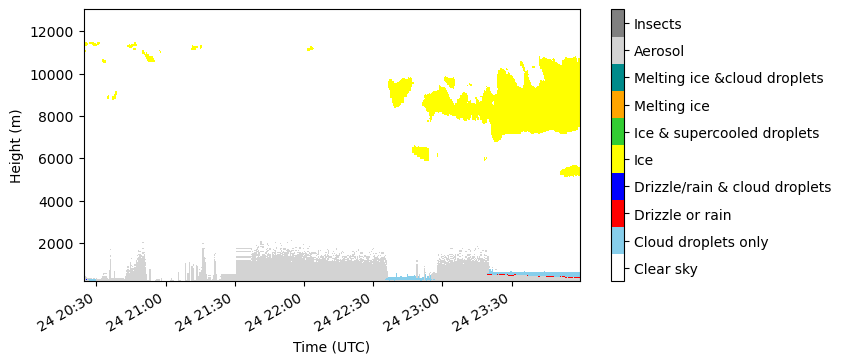

In [49]:
colors =  ['white', 'skyblue', 'red', 'blue', 'yellow', 'limegreen', 'orange', 'darkcyan', 'lightgrey', 'grey']
cmap = LinearSegmentedColormap.from_list('cloudnet_cmap', colors, N=len(colors))

fig, ax = plt.subplots(figsize=(8,4))
pc = ax.pcolormesh(data.time.values, data.height.values, data.target_classification.values.T, 
                   shading='auto', cmap=cmap, vmin=-0.5, vmax=9.5)
ax.set_xlabel('Time (UTC)')
ax.set_ylabel('Height (m)')
fig.autofmt_xdate()

cb = fig.colorbar(pc, ticks=[0,1,2,3,4,5,6,7,8,9])
cb.ax.set_yticklabels(['Clear sky', 'Cloud droplets only', 'Drizzle or rain', 'Drizzle/rain & cloud droplets', 
                       'Ice', 'Ice & supercooled droplets', 'Melting ice', 'Melting ice &cloud droplets', 
                       'Aerosol', 'Insects'])
plt.show()

### Cloud top height

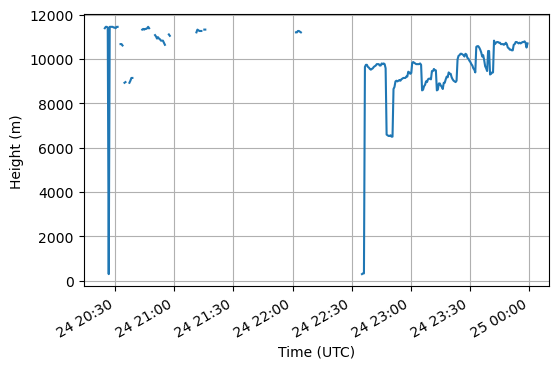

In [50]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(data.time.values, data.cloud_top_height.values)
ax.set_xlabel('Time (UTC)')
ax.set_ylabel('Height (m)')
ax.grid()
fig.autofmt_xdate()
plt.show()

### Clout base height

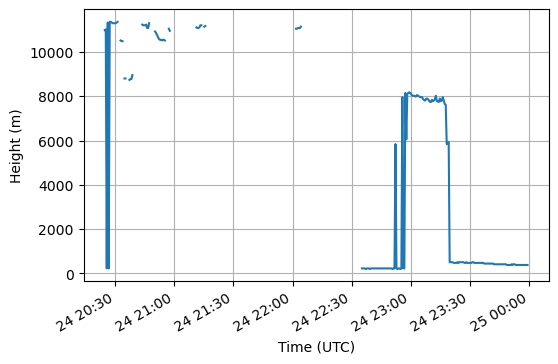

In [51]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(data.time.values, data.cloud_base_height.values)
ax.set_xlabel('Time (UTC)')
ax.set_ylabel('Height (m)')
ax.grid()
fig.autofmt_xdate()
plt.show()

### Cloud net classification + cloud base and top heights

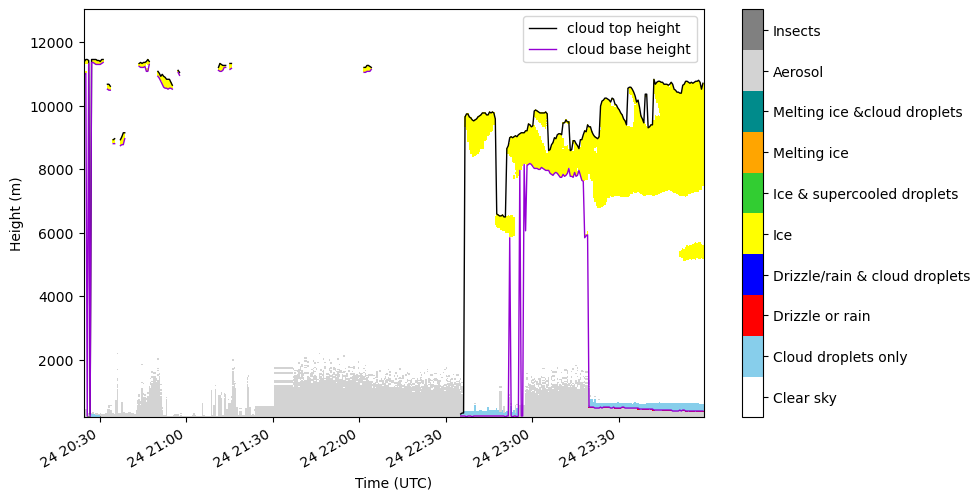

In [52]:
fig, ax = plt.subplots(figsize=(10,6))
pc = ax.pcolormesh(data.time.values, data.height.values, data.target_classification.values.T, 
                   shading='auto', cmap=cmap, vmin=-0.5, vmax=9.5)

ax.plot(data.time.values, data.cloud_top_height.values, 'k', lw=1, label= 'cloud top height')
ax.plot(data.time.values, data.cloud_base_height.values, color='darkviolet', lw=1, label= 'cloud base height')

ax.set_xlabel('Time (UTC)')
ax.set_ylabel('Height (m)')

fig.autofmt_xdate()

cb = fig.colorbar(pc, ticks=[0,1,2,3,4,5,6,7,8,9])
cb.ax.set_yticklabels(['Clear sky', 'Cloud droplets only', 'Drizzle or rain', 'Drizzle/rain & cloud droplets', 
                       'Ice', 'Ice & supercooled droplets', 'Melting ice', 'Melting ice &cloud droplets', 
                       'Aerosol', 'Insects'])
plt.legend(loc='upper right')
plt.show()